# KNNClass

Importing Library as follows

In [1]:
import numpy as np
import pandas as pd

Importing dataset form local host

In [2]:
df = pd.read_csv("D:/Statistics (Python)/Datasets/RidingMowers.csv")

Get_dummies

In [3]:
dum_df = pd.get_dummies(df)
dum_df = dum_df.drop('Response_Not Bought', axis=1)

In [4]:
from sklearn.model_selection import train_test_split 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report, accuracy_score
from sklearn.neighbors import KNeighborsClassifier

In [5]:
X = dum_df.iloc[:,0:2]
y = dum_df.iloc[:,2]

In [6]:
y.value_counts()
pd.crosstab(index=y,columns='Count',normalize='all')

col_0,Count
Response_Bought,
0,0.594444
1,0.405556


 Visualizing the Data

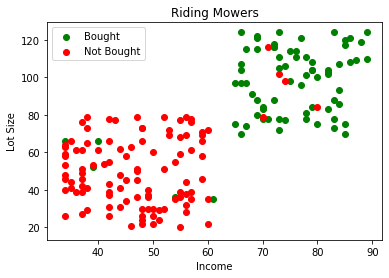

In [9]:
import matplotlib.pyplot as plt
X_B = X[y==1]
X_NB = X[y==0]
plt.scatter(X_B.Income,X_B.Lot_Size,c="green",label="Bought")
plt.scatter(X_NB.Income,X_NB.Lot_Size,c="red",label="Not Bought")
plt.legend()
plt.title("Riding Mowers")
plt.xlabel('Income')
plt.ylabel('Lot Size')
plt.show()

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, 
                                                    random_state=2018,
                                                    stratify=y)

In [10]:
knn = KNeighborsClassifier(n_neighbors=9)

knn.fit( X_train , y_train )
y_pred = knn.predict(X_test)

In [11]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print(accuracy_score(y_test, y_pred))

[[30  2]
 [ 1 21]]
              precision    recall  f1-score   support

           0       0.97      0.94      0.95        32
           1       0.91      0.95      0.93        22

    accuracy                           0.94        54
   macro avg       0.94      0.95      0.94        54
weighted avg       0.95      0.94      0.94        54

0.9444444444444444


 Supported from version 0.22 onwards 

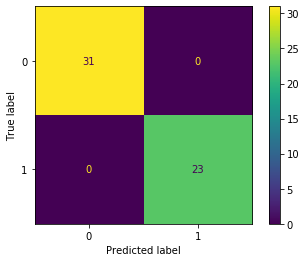

In [12]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(knn,X_test,y_pred,labels=[0,1])

In [13]:
from sklearn.metrics import roc_curve, roc_auc_score

Compute predicted probabilities: y_pred_prob

In [14]:
y_pred_prob = knn.predict_proba(X_test)[:,1]

 Generate ROC curve values: fpr, tpr, thresholds

In [15]:
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)

Plot ROC curve 

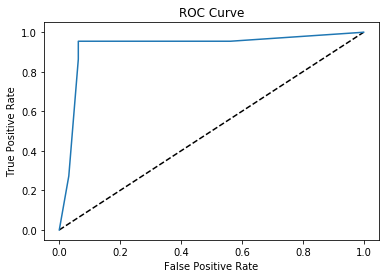

In [16]:
import matplotlib.pyplot as plt
plt.plot([0, 1], [0, 1], 'k--')
plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

In [17]:
roc_auc_score(y_test, y_pred_prob)

0.9268465909090909